# Create LSOA to Ambulance region datafiles

Read in two files (LSOA to CCG, and CCG to Ambulance region) and create a LSOA to Ambulance region datafile

In [28]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import os
from matplotlib.transforms import Bbox
import matplotlib.colors as colors
import random
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

Read in LSOA to CCG

In [29]:
lsoa_ccg_data = pd.read_csv('./data/demographic/Lower_Layer_Super_Output_Area_(2011)_to_Clinical_Commissioning_Group_to_Local_Authority_District_(April_2021)_Lookup_in_England.csv', 
                   index_col='CCG21NM')
lsoa_ccg_data.head(2)

,FID,LSOA11CD,LSOA11NM,CCG21CD,CCG21CDH,LAD21CD,LAD21NM
CCG21NM,,,,,,,
NHS Barnsley CCG,1,E01007420,Barnsley 016C,E38000006,02P,E08000016,Barnsley
NHS Barnsley CCG,2,E01007317,Barnsley 018A,E38000006,02P,E08000016,Barnsley


Read in CCG to Ambulance

In [30]:
ccg_ambo_data = pd.read_csv('./data/demographic/ambulance_service_info_ccg_lookup.csv')
ccg_ambo_data.head(2)

,NHS CCG code,CCG name,Office for National Statistics (ONS) April 2021 CCG code,Ambulance Service,NHS Ambulance Service Region Name,NHS Ambulance Service Region code,ONS Ambulance Service Region Code
0,02Q,NHS Bassetlaw CCG,E38000008,EMAS,Midlands,Y60,E40000008
1,03W,NHS East Leicestershire and Rutland CCG,E38000051,EMAS,Midlands,Y60,E40000008


Edit erroneous data. There's two "Ambulance Service" (SCAS and SECAmb) both as "South East" for field "NHS Ambulance Service Region Name".

Consulting with the green ambulance map provided, there are separate ambulance services: "South East Coast" and "South Central"

Overwrite the field "NHS Ambulance Service Region Name" with "South Central" and "South East Coast" for these two

In [31]:
mask = ccg_ambo_data['Ambulance Service '] == 'SCAS'
ccg_ambo_data['NHS Ambulance Service Region Name'][mask] = 'South Central'
mask = ccg_ambo_data['Ambulance Service '] == 'SECAmb'
ccg_ambo_data['NHS Ambulance Service Region Name'][mask] = 'South East Coast'

In [32]:
ccg_ambo_data.tail(5)

,NHS CCG code,CCG name,Office for National Statistics (ONS) April 2021 CCG code,Ambulance Service,NHS Ambulance Service Region Name,NHS Ambulance Service Region code,ONS Ambulance Service Region Code
99,03R,NHS Wakefield CCG,E38000190,YAS,North East and Yorkshire,Y63,E40000009
100,15F,NHS Leeds CCG,E38000225,YAS,North East and Yorkshire,Y63,E40000009
101,36J,NHS Bradford District and Craven CCG,E38000232,YAS,North East and Yorkshire,Y63,E40000009
102,42D,NHS North Yorkshire CCG,E38000241,YAS,North East and Yorkshire,Y63,E40000009
103,X2C4Y,NHS Kirklees CCG,E38000254,YAS,North East and Yorkshire,Y63,E40000009


Add missing rows of data for two CCGs

In [33]:
row = ccg_ambo_data.shape[0]
ccg_ambo_data.loc[row+1] = ['','NHS Bedfordshire, Luton and Milton Keynes','','EEAST','East of England','Y61','E40000007']
ccg_ambo_data.loc[row+2] = ['','NHS Hampshire, Southampton and Isle of Wight CCG','','SCAS','South Central','?','?']
ccg_ambo_data.tail(5)

,NHS CCG code,CCG name,Office for National Statistics (ONS) April 2021 CCG code,Ambulance Service,NHS Ambulance Service Region Name,NHS Ambulance Service Region code,ONS Ambulance Service Region Code
101,36J,NHS Bradford District and Craven CCG,E38000232,YAS,North East and Yorkshire,Y63,E40000009
102,42D,NHS North Yorkshire CCG,E38000241,YAS,North East and Yorkshire,Y63,E40000009
103,X2C4Y,NHS Kirklees CCG,E38000254,YAS,North East and Yorkshire,Y63,E40000009
105,,"NHS Bedfordshire, Luton and Milton Keynes",,EEAST,East of England,Y61,E40000007
106,,"NHS Hampshire, Southampton and Isle of Wight CCG",,SCAS,South Central,?,?


In [34]:
ccg_ambo_data.set_index('CCG name', inplace=True)
ccg_ambo_data.tail(5)

,NHS CCG code,Office for National Statistics (ONS) April 2021 CCG code,Ambulance Service,NHS Ambulance Service Region Name,NHS Ambulance Service Region code,ONS Ambulance Service Region Code
CCG name,,,,,,
NHS Bradford District and Craven CCG,36J,E38000232,YAS,North East and Yorkshire,Y63,E40000009
NHS North Yorkshire CCG,42D,E38000241,YAS,North East and Yorkshire,Y63,E40000009
NHS Kirklees CCG,X2C4Y,E38000254,YAS,North East and Yorkshire,Y63,E40000009
"NHS Bedfordshire, Luton and Milton Keynes",,,EEAST,East of England,Y61,E40000007
"NHS Hampshire, Southampton and Isle of Wight CCG",,,SCAS,South Central,?,?


In [35]:
lsoa_ambo_data = lsoa_ccg_data.join(ccg_ambo_data).reset_index()
lsoa_ambo_data.set_index('LSOA11CD', inplace=True)
lsoa_ambo_data.rename(columns={"Index": "CCG name"}, inplace=True)
lsoa_ambo_data.head()

,index,FID,LSOA11NM,CCG21CD,CCG21CDH,LAD21CD,LAD21NM,NHS CCG code,Office for National Statistics (ONS) April 2021 CCG code,Ambulance Service,NHS Ambulance Service Region Name,NHS Ambulance Service Region code,ONS Ambulance Service Region Code
LSOA11CD,,,,,,,,,,,,,
E01007420,NHS Barnsley CCG,1,Barnsley 016C,E38000006,02P,E08000016,Barnsley,02P,E38000006,YAS,North East and Yorkshire,Y63,E40000009
E01007317,NHS Barnsley CCG,2,Barnsley 018A,E38000006,02P,E08000016,Barnsley,02P,E38000006,YAS,North East and Yorkshire,Y63,E40000009
E01007421,NHS Barnsley CCG,4,Barnsley 027A,E38000006,02P,E08000016,Barnsley,02P,E38000006,YAS,North East and Yorkshire,Y63,E40000009
E01007318,NHS Barnsley CCG,6,Barnsley 018B,E38000006,02P,E08000016,Barnsley,02P,E38000006,YAS,North East and Yorkshire,Y63,E40000009
E01007319,NHS Barnsley CCG,9,Barnsley 015A,E38000006,02P,E08000016,Barnsley,02P,E38000006,YAS,North East and Yorkshire,Y63,E40000009


In [36]:
mask = lsoa_ambo_data['Ambulance Service '] == 'EEAST'
df_copy = lsoa_ambo_data[mask]


,index,FID,LSOA11NM,CCG21CD,CCG21CDH,LAD21CD,LAD21NM,NHS CCG code,Office for National Statistics (ONS) April 2021 CCG code,Ambulance Service,NHS Ambulance Service Region Name,NHS Ambulance Service Region code,ONS Ambulance Service Region Code
LSOA11CD,,,,,,,,,,,,,
E01021475,NHS Basildon and Brentwood CCG,3,Brentwood 007E,E38000007,99E,E07000068,Brentwood,99E,E38000007,EEAST,East of England,Y61,E40000007
E01021290,NHS Basildon and Brentwood CCG,5,Basildon 016D,E38000007,99E,E07000066,Basildon,99E,E38000007,EEAST,East of England,Y61,E40000007
E01021291,NHS Basildon and Brentwood CCG,7,Basildon 016E,E38000007,99E,E07000066,Basildon,99E,E38000007,EEAST,East of England,Y61,E40000007
E01033063,NHS Basildon and Brentwood CCG,8,Brentwood 007F,E38000007,99E,E07000068,Brentwood,99E,E38000007,EEAST,East of England,Y61,E40000007
E01021292,NHS Basildon and Brentwood CCG,11,Basildon 017B,E38000007,99E,E07000066,Basildon,99E,E38000007,EEAST,East of England,Y61,E40000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...
E01030129,NHS West Suffolk CCG,11596,St Edmundsbury 005D,E38000204,07K,E07000245,West Suffolk,07K,E38000204,EEAST,East of England,Y61,E40000007
E01030130,NHS West Suffolk CCG,11597,St Edmundsbury 003A,E38000204,07K,E07000245,West Suffolk,07K,E38000204,EEAST,East of England,Y61,E40000007
E01030131,NHS West Suffolk CCG,11598,St Edmundsbury 003B,E38000204,07K,E07000245,West Suffolk,07K,E38000204,EEAST,East of England,Y61,E40000007


In [9]:
lsoa_ambo_data.to_csv('./data/demographic/ambulance_service_regions_lsoa.csv')

Read in LSOA shapefile

In [10]:
filename = 'zip://./data/Lower_layer_super_output_areas_(E+W)_2011_Boundaries_(Generalised_Clipped)_V2.zip'
gdf_lsoa = gpd.read_file(filename, crs='EPSG:27700')
gdf_lsoa.head()

,LSOA11CD,LSOA11NM,LSOA11NMW,geometry
0,E01000001,City of London 001A,City of London 001A,"POLYGON ((532105.092 182011.230, 532162.491 18..."
1,E01000002,City of London 001B,City of London 001B,"POLYGON ((532746.813 181786.891, 532671.688 18..."
2,E01000003,City of London 001C,City of London 001C,"POLYGON ((532135.145 182198.119, 532158.250 18..."
3,E01000005,City of London 001E,City of London 001E,"POLYGON ((533807.946 180767.770, 533649.063 18..."
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,"POLYGON ((545122.049 184314.931, 545271.917 18..."


Add ambulance data to the LSOA polygons

In [11]:
gdf_lsoa.set_index('LSOA11CD', inplace=True)
col = 'Ambulance Service '#'NHS Ambulance Service Region Name'
gdf_lsoa = gdf_lsoa.join(lsoa_ambo_data[col]).reset_index()
gdf_lsoa.head()

,LSOA11CD,LSOA11NM,LSOA11NMW,geometry,Ambulance Service
0,E01000001,City of London 001A,City of London 001A,"POLYGON ((532105.092 182011.230, 532162.491 18...",LAS
1,E01000002,City of London 001B,City of London 001B,"POLYGON ((532746.813 181786.891, 532671.688 18...",LAS
2,E01000003,City of London 001C,City of London 001C,"POLYGON ((532135.145 182198.119, 532158.250 18...",LAS
3,E01000005,City of London 001E,City of London 001E,"POLYGON ((533807.946 180767.770, 533649.063 18...",LAS
4,E01000006,Barking and Dagenham 016A,Barking and Dagenham 016A,"POLYGON ((545122.049 184314.931, 545271.917 18...",LAS


Read in hospital data (Stroke Team, SSNAP name, Easting, Northing)

In [12]:
gdf_units = gpd.read_file('./data/stroke_hospitals_2022.csv')

gdf_units["geometry"] = gpd.points_from_xy(
        gdf_units.Easting, gdf_units.Northing)
gdf_units = gdf_units.set_crs(epsg=27700)

# Restrict to the units delivering thrombolysis
mask = gdf_units['Use_IVT']=="1"
gdf_units = gdf_units[mask]
gdf_units.head()

,Postcode,Hospital_name,Use_IVT,Use_MT,Country,Strategic Clinical Network,Health Board / Trust,Stroke Team,SSNAP name,Admissions 21/22,Thrombolysis,ivt_rate,Easting,Northing,Neuroscience,30 England Thrombectomy Example,hospital_city,Notes,geometry
0,RM70AG,RM70AG,1,1,England,London SCN,Barking; Havering and Redbridge University Hos...,"Queen's Hospital, Romford",Queens Hospital Romford HASU,981,117,11.9,551118,187780,1,0,Romford,,POINT (551118.000 187780.000)
1,E11BB,E11BB,1,1,England,London SCN,Barts Health NHS Trust,The Royal London Hospital,Royal London Hospital HASU,861,115,13.4,534829,181798,1,1,Royal London,,POINT (534829.000 181798.000)
2,SW66SX,SW66SX,1,1,England,London SCN,Imperial College Healthcare NHS Trust,"Charing Cross Hospital, London",Charing Cross Hospital HASU,1147,113,9.9,524226,176487,1,1,Charing Cross,,POINT (524226.000 176487.000)
3,SE59RW,SE59RW,1,1,England,London SCN,King's College Hospital NHS Foundation Trust,"King's College Hospital, London",King's College Hospital HASU,824,124,15,532536,176228,1,0,Kings College,,POINT (532536.000 176228.000)
4,BR68ND,BR68ND,1,0,England,London SCN,King's College Hospital NHS Foundation Trust,Princess Royal University Hospital; Orpington,Princess Royal University Hospital HASU,847,113,13.3,543443,165032,0,0,Princess Royal,,POINT (543443.000 165032.000)


Convert CRS so compatible with basemap

In [13]:
# When using base maps convert data to epsg:3857
gdf_lsoa = gdf_lsoa.to_crs(epsg=3857)
gdf_units = gdf_units.to_crs(epsg=3857)

Define mapping regions for full plot (and later for the London inset plot)

In [14]:
eng_wales_bounds = gdf_lsoa.bounds
eng_wales_bounds = eng_wales_bounds.merge(gdf_lsoa[col],how = 'left',
                      left_on = eng_wales_bounds.index,
                      right_on = gdf_lsoa.index)
eng_wales_bounds = eng_wales_bounds.set_index(col)
eng_wales_bounds.drop('key_0', axis = 1, inplace = True)
eng_wales_bounds.head()

,minx,miny,maxx,maxy
Ambulance Service,,,,
LAS,-11103.985964,6.712873e+06,-10507.773204,6.714078e+06
LAS,-10679.268839,6.712740e+06,-9810.492256,6.714052e+06
LAS,-10878.125204,6.713845e+06,-10326.347870,6.714378e+06
LAS,-8909.573315,6.711960e+06,-8096.026680,6.713347e+06
LAS,9453.003088,6.716908e+06,10419.519918,6.717693e+06


In [15]:
def add_nonoverlapping_text_labels(gdf_units, ax, col, y_step=0.05, fontsize=7):
    """
    #https://stackoverflow.com/questions/43916834/matplotlib-dynamically-change-text-position


    """

    text_rectangles = []

    # Better results if the labels are sorted descending in the y axis
    gdf_units['sort_by'] = gdf_units.geometry.y
    gdf_units.sort_values("sort_by", ascending=False, inplace=True)
    del gdf_units["sort_by"]

    # Add labels
    for x, y, label in zip(
        gdf_units.geometry.x, gdf_units.geometry.y, gdf_units[col]):
            text = ax.annotate(label, xy=(x, y), xytext=(8, 8), 
                        textcoords="offset points", fontsize=fontsize, 
                        bbox=dict(facecolor='w', alpha=0.3, edgecolor='none', boxstyle="round", pad=0.1))
            x, y = text.get_position()
            new_x = x - 2
            text.set_position((new_x, y))
                    
            rect = text.get_window_extent()

            for other_rect in text_rectangles:
                while Bbox.intersection(rect, other_rect):  # overlapping
                    x, y = text.get_position()
                    new_y = y - y_step
                    text.set_position((x, new_y))
                    rect = text.get_window_extent()
            text_rectangles.append(rect)
    return (ax)

<AxesSubplot:>

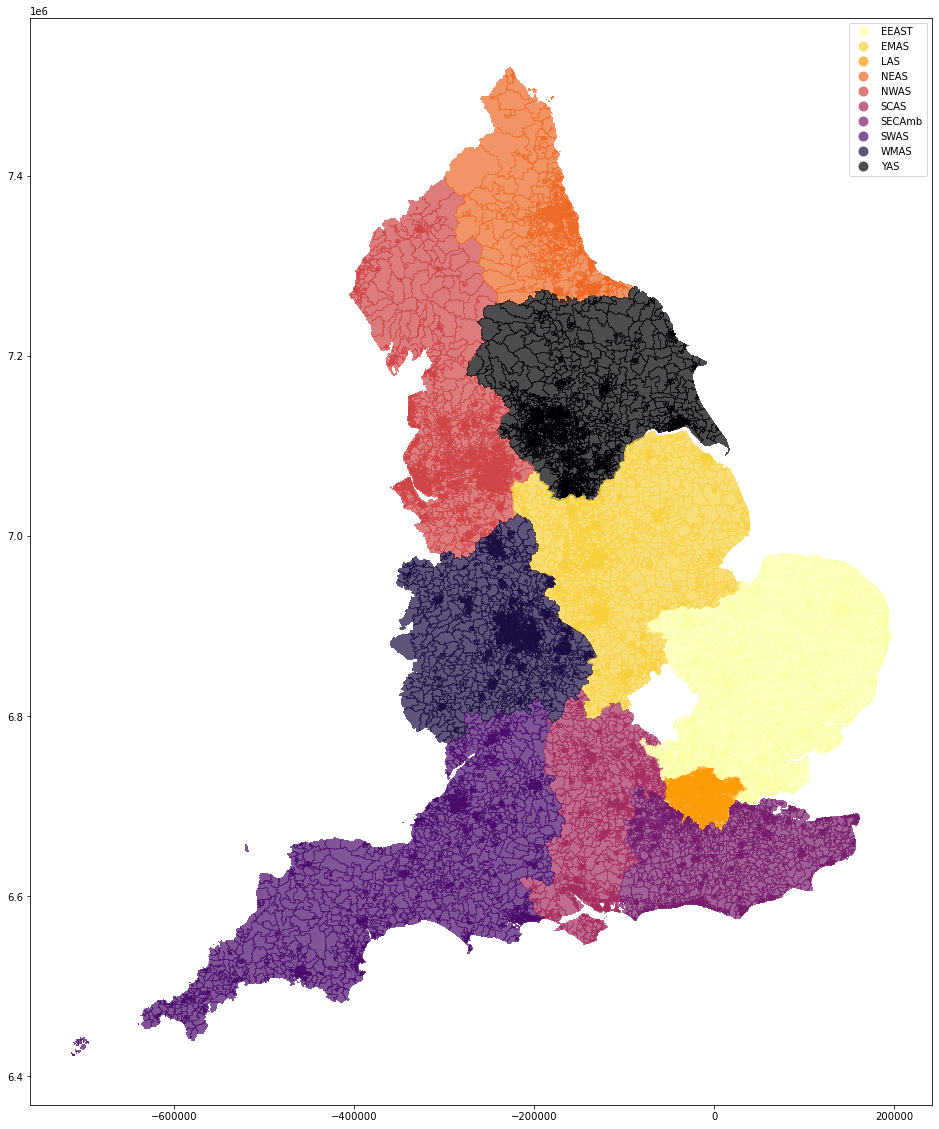

In [16]:
#col = 'NHS Ambulance Service Region Name'
col_readable = 'NHS Ambulance Service Region'

fig, ax = plt.subplots(figsize=(20, 20)) # Make max dimensions 10x10 inch
gdf_lsoa.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column=col, # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 linewidth=0.0,# Use linewidth=0 to hide boarder lines
#                 vmin=0, # Manual scale min (remove to make automatic)
#                 vmax=70, # Manual scale max (remove to make automatic)
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
                 #legend_kwds={'shrink':0.5, 'label':f'{col_readable}'},
                 # Set to display legend
                 legend=True,
                 # Set transparancy (to help reveal basemap
                 alpha = 0.70)

Map Ambulance Region, by LSOA

TypeError: __init__() got an unexpected keyword argument 'shrink'

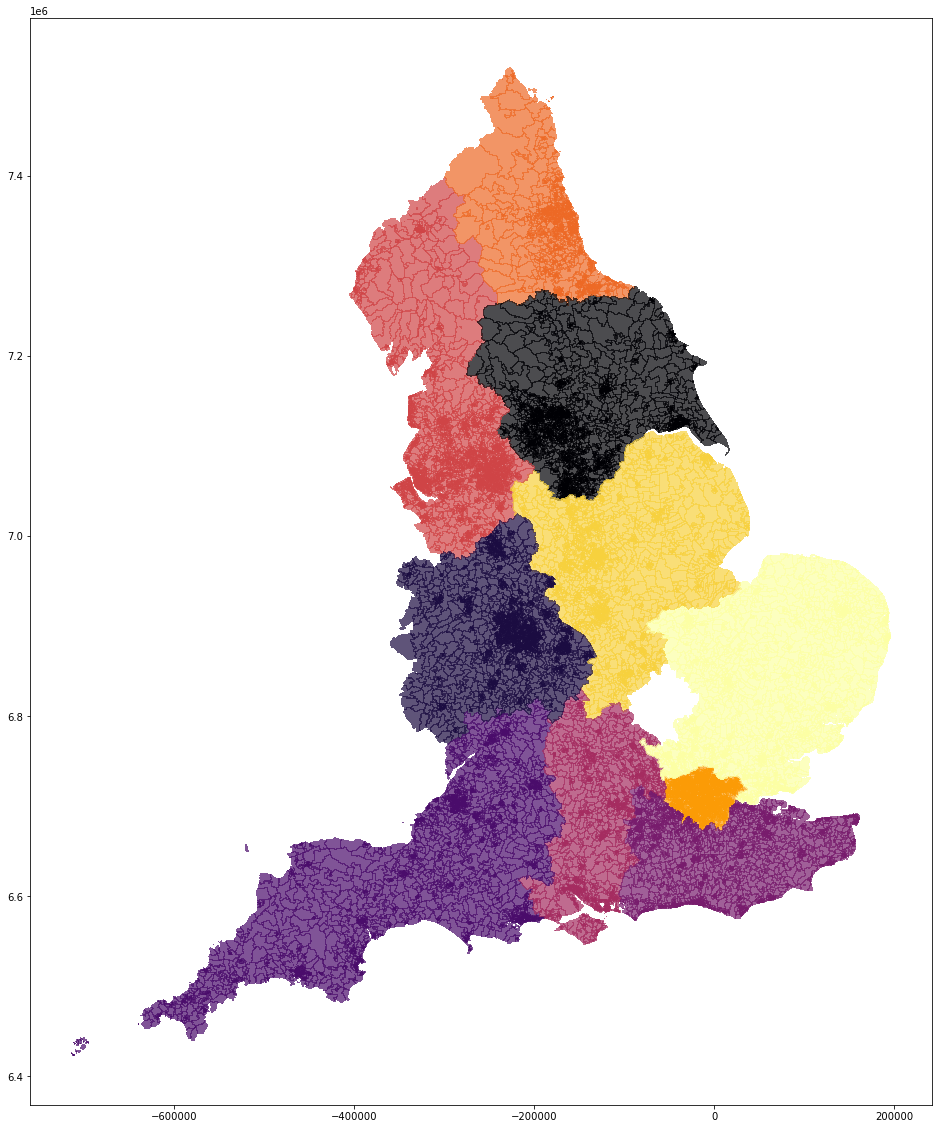

In [17]:
show_labels = True

#col = 'NHS Ambulance Service Region Name'
col_readable = 'NHS Ambulance Service Region'

fig, ax = plt.subplots(figsize=(20, 20)) # Make max dimensions 10x10 inch
gdf_lsoa.plot(ax=ax, # Set which axes to use for plot (only one here)
                 column=col, # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 linewidth=0.0,# Use linewidth=0 to hide boarder lines
#                 vmin=0, # Manual scale min (remove to make automatic)
#                 vmax=70, # Manual scale max (remove to make automatic)
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
                 legend_kwds={'shrink':0.5, 'label':f'{col_readable}'},
                 # Set to display legend
                 legend=True,
                 # Set transparancy (to help reveal basemap
                 alpha = 0.70)

# Plot location of hospitals
gdf_units.plot(ax=ax, edgecolor='k', facecolor='w', markersize=120, 
               marker='*')


if show_labels:
    ax = add_nonoverlapping_text_labels(gdf_units, ax, 'hospital_city',
                                        y_step=0.05, fontsize=8)
        
# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)



# give some more space at bottom for london inset map
ax.set_ylim(ax.get_ylim()[0] - 100000, ax.get_ylim()[1])
# give some more space at right for hospital name label
ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + 50000)

# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)

# Insert an inset map (loc=4 places it bottom right)
axins = zoomed_inset_axes(ax, 2, loc=4)

# Identify london hospitals to go in the inset map
mask = gdf_units["Strategic Clinical Network"]=="London SCN"
london_hospitals = gdf_units["Hospital_name"][mask].to_list()

# identify map area to plot in the inset map
# initialise exteme values
minx_ = np.inf
miny_ = np.inf
maxx_ = 0
maxy_ = 0
# Find min and max x and y for the london hospitals
for h in london_hospitals:
    minx,miny,maxx,maxy =  eng_wales_bounds.loc[h]
    minx_ = min(minx_, minx)
    miny_ = min(miny_, miny)
    maxx_ = max(maxx_, maxx)
    maxy_ = max(maxy_, maxy)

# Set extent of inset map
axins.set_xlim(minx_, maxx_)
axins.set_ylim(miny_, maxy_)

# Define lines connecting inset map to main map
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.5")

# Plot zoom window
gdf_lsoa.plot(ax=axins, # Set which axes to use for plot (only one here)
                 column=col, # Column to apply colour
                 antialiased=False, # Avoids artifact boundry lines
                 edgecolor='face', # Make LSOA boundry same colour as area
                 linewidth=0.0,# Use linewidth=0 to hide boarder lines
#                 vmin=0, # Manual scale min (remove to make automatic)
#                 vmax=70, # Manual scale max (remove to make automatic)
                 cmap='inferno_r', # Colour map to use
                 # Adjust size of colourmap key, and add label
#                 legend_kwds={'shrink':0.5, 'label':f'{col_readable}'},
                 # Set to display legend
#                 legend=True,
                 # Set transparancy (to help reveal basemap
                 alpha = 0.70)


# Plot location of hospitals
gdf_units.plot(ax=axins, edgecolor='k', facecolor='w', markersize=120, 
               marker='*')

# Label hospitals
if show_labels:
    axins = add_nonoverlapping_text_labels(gdf_units, axins, 'hospital_city',
                                        y_step=0.05, fontsize=8)
    
# Add base map (note that we specifiy the same CRS as we are using)
# Use manual zoom to adjust level of detail of base map
ctx.add_basemap(ax=axins, 
                source=ctx.providers.OpenStreetMap.Mapnik,zoom=10)

# Remove x and y ticks
plt.setp(axins.get_xticklabels(), visible=False)
plt.setp(axins.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)

ax.set_axis_off() # Turn of axis line and numbers
ax.set_title(f'{col_readable}')
# Adjust for printing
ax.margins(0)
ax.apply_aspect()
plt.subplots_adjust(left=0.01, right=1.0, bottom=0.0, top=1.0)
plt.savefig(f'map_{col}.jpg', dpi=300, bbox_inches='tight', pad_inches=0.2) # Save figure
plt.show()